# CHI-CHENG IP

## Research question/interests
##### I am wondering is there a significantly visuable relation between humidity and temperature. Logically, high temperature will expedite the evaporation process. For this questions, I will need to compare the average and temperature in different period. I need to find:

    - A line chart showing temperature from 2020 to 2019(ten years).
    - A line chart showing humidity from 2020 to 2019(ten years).
    - A combination of these two chart for comparison.

## EDA

In [2]:
# Import necessary functions
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import project_functions1 as pf1
import project_functions3 as pf3

In [3]:
# Setup seaborn
sns.set_theme(style='whitegrid', palette='deep', font_scale=3)
sns.color_palette("husl", 9)
sns.set(rc={'figure.figsize':(13.5,8.27)})

In [4]:
# Setup matplotlib
plt.rcParams['figure.figsize'] = [8.0, 8.0]
plt.rcParams['figure.dpi'] = 140

In [14]:
# Load raw data.
df0 = pd.read_csv("../data/raw/climate_data.csv")
df0.head()

,Date,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),...,Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Date1,Month,diff_pressure
0,2009-01-01,37.8,35.0,12.7,29.7,26.4,36.8,274.0,0.0,0.0,...,4.0,27.0,29.762,29.596,41.4,59.0,40.0,2009-01-01,1,0.166
1,2009-01-02,43.2,32.0,14.7,29.5,12.8,18.0,240.0,0.0,0.0,...,4.0,16.0,29.669,29.268,35.7,51.0,52.0,2009-01-02,1,0.401
2,2009-01-03,25.7,60.0,12.7,29.7,8.3,12.2,290.0,0.0,0.0,...,8.0,35.0,30.232,29.260,25.3,38.0,41.0,2009-01-03,1,0.972
3,2009-01-04,9.3,67.0,0.1,30.4,2.9,4.5,47.0,0.0,0.0,...,7.0,35.0,30.566,30.227,12.7,20.0,32.0,2009-01-04,1,0.339
4,2009-01-05,23.5,30.0,-5.3,29.9,16.7,23.1,265.0,0.0,0.0,...,5.0,13.0,30.233,29.568,38.0,53.0,32.0,2009-01-05,1,0.665


In [15]:
# Clear dataframe
df = pf3.clear_data("../data/raw/climate_data.csv")
df.head()

,Date,avg_tem,avg_hum,max_tem,min_tem,max_hum,min_hum,max_hea,Month,Day,Year
0,2009-01-01,37.8,35.0,40.0,34.0,4.0,27.0,40.0,1,1,2009
1,2009-01-02,43.2,32.0,52.0,37.0,4.0,16.0,52.0,1,2,2009
2,2009-01-03,25.7,60.0,41.0,6.0,8.0,35.0,41.0,1,3,2009
3,2009-01-04,9.3,67.0,19.0,-0.0,7.0,35.0,32.0,1,4,2009
4,2009-01-05,23.5,30.0,30.0,15.0,5.0,13.0,32.0,1,5,2009


#### Filtered the cleared dataset into different datasets

Filtered by year.

In [7]:
df_2009_all = pf3.filter_1year(df, 2009)
df_2014_all = pf3.filter_1year(df, 2014)
df_2019_all = pf3.filter_1year(df, 2019)

Datasets which only contains average temperature.

In [8]:
# Set up average temperature dataframe
df_2009_01_temp = pf3.filter_avg_temp_monthly(df, 2009, 1)
df_2009_04_temp = pf3.filter_avg_temp_monthly(df, 2009, 4)
df_2009_08_temp = pf3.filter_avg_temp_monthly(df, 2009, 8)
df_2009_10_temp = pf3.filter_avg_temp_monthly(df, 2009, 10)
df_2009_temp = pf3.filter_avg_temp_yearly(df, 2009, 2009)
df_2014_temp = pf3.filter_avg_temp_yearly(df, 2014, 2014)
df_2019_temp = pf3.filter_avg_temp_yearly(df, 2019, 2019)

Datasets which only contains average humidity.

In [9]:
# Set up average humidity dataframe
df_2009_01_humi = pf3.filter_avg_humi_monthly(df, 2009, 1)
df_2009_04_humi = pf3.filter_avg_humi_monthly(df, 2009, 4)
df_2009_08_humi = pf3.filter_avg_humi_monthly(df, 2009, 8)
df_2009_10_humi = pf3.filter_avg_humi_monthly(df, 2009, 10)
df_2009_humi = pf3.filter_avg_humi_yearly(df, 2009, 2009)
df_2014_humi = pf3.filter_avg_humi_yearly(df, 2014, 2014)
df_2019_humi = pf3.filter_avg_humi_yearly(df, 2019, 2019)

Datasets which avgerage temperature vs. average temperature.

In [10]:
# Set up combined dataframe
df_2009_01 = pf3.combin_m(df_2009_01_temp, df_2009_01_humi)
df_2009_04 = pf3.combin_m(df_2009_04_temp, df_2009_04_humi)
df_2009_08 = pf3.combin_m(df_2009_08_temp, df_2009_08_humi)
df_2009_10 = pf3.combin_m(df_2009_10_temp, df_2009_10_humi)
df_2009 = pf3.combin_y(df_2009_temp, df_2009_humi)
df_2014 = pf3.combin_y(df_2014_temp, df_2014_humi)
df_2019 = pf3.combin_y(df_2019_temp, df_2019_humi)

## Data Analysis

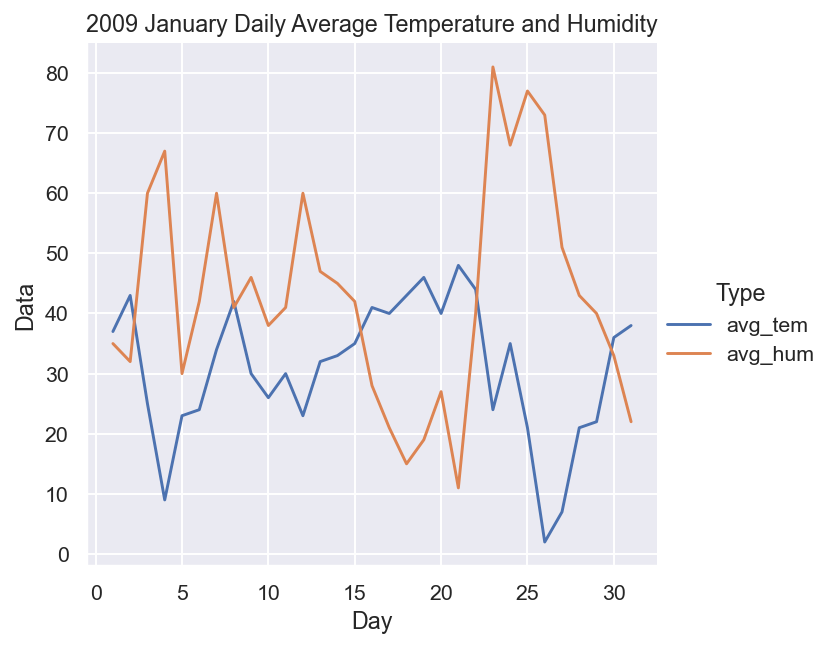

In [ ]:
# Daily average temperature 2009-01
sns.relplot(data = df_2009_01, kind='line', x='Day', y='Data', hue='Type').set(title='2009 January Daily Average Temperature and Humidity')
plt.subplots_adjust(top=0.88)
# Save plot as a figure.
# plt.savefig('../images/January Daily Average Temperature and Humidity_2009.png')  

### **Figure 1**
*The plots above shows the daily average temperature and humidity in January 2019. The blue line represents the average tmperature and the orange one the average humidity. The lines runs to the opposite directions for most of the time.*

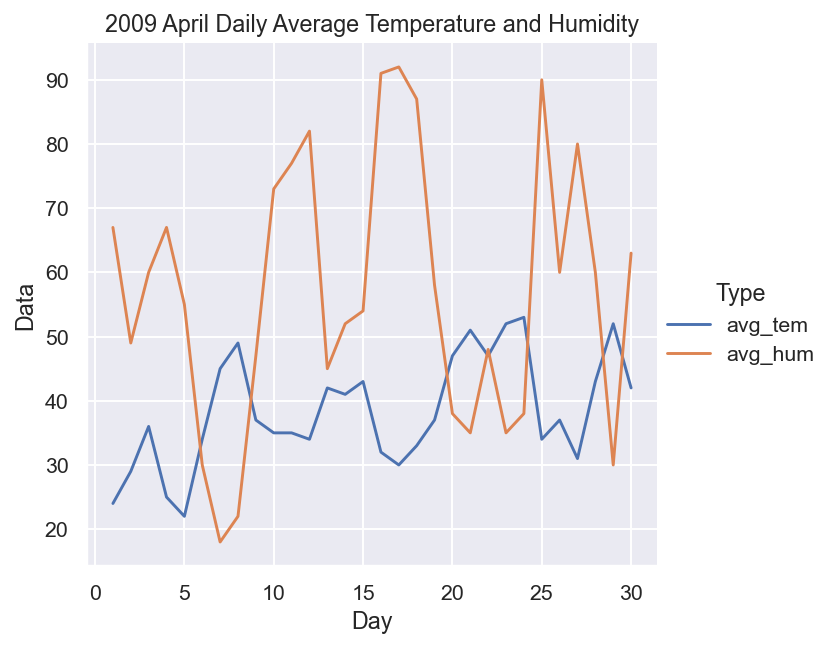

In [ ]:
# Daily average temperature 2009-04
sns.relplot(data = df_2009_04, kind='line', x='Day', y='Data', hue='Type').set(title='2009 April Daily Average Temperature and Humidity')
plt.subplots_adjust(top=0.88)
# Save plot as a figure.
# plt.savefig('../images/April Daily Average Temperature and Humidity_2009.png') 

### **Figure 2**
*The plots above shows the daily average temperature and humidity in April 2019. The blue line represents the average tmperature and the orange one the average humidity. The lines runs to the opposite directions for most of the time.*

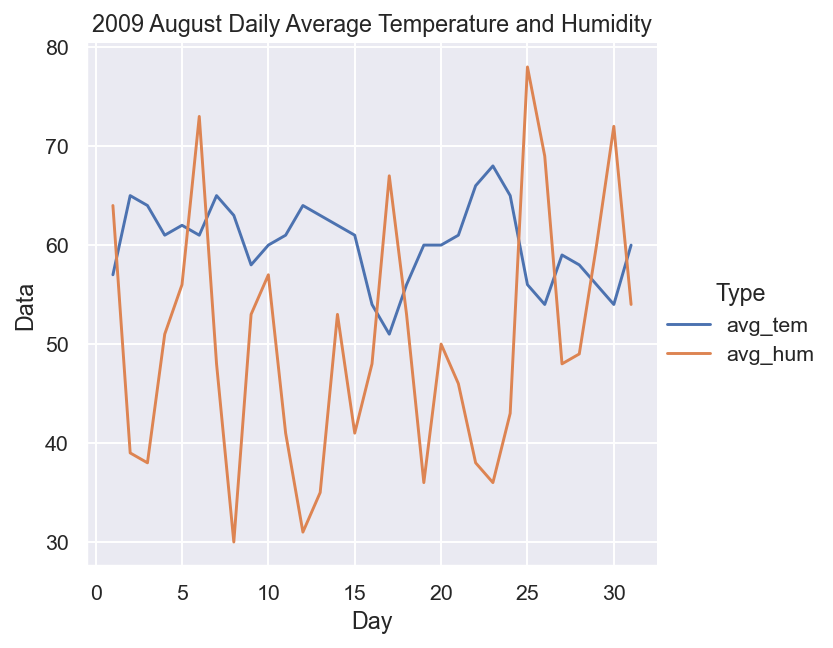

In [ ]:
# Daily average temperature 2009-08
sns.relplot(data = df_2009_08, kind='line', x='Day', y='Data', hue='Type').set(title='2009 August Daily Average Temperature and Humidity')
plt.subplots_adjust(top=0.88)
# Save plot as a figure.
# plt.savefig('../images/August Daily Average Temperature and Humidity_2009.png') 

### **Figure 3**
*The plots above shows the daily average temperature and humidity in August 2019. The blue line represents the average tmperature and the orange one the average humidity. The lines runs to the opposite directions for most of the time.*

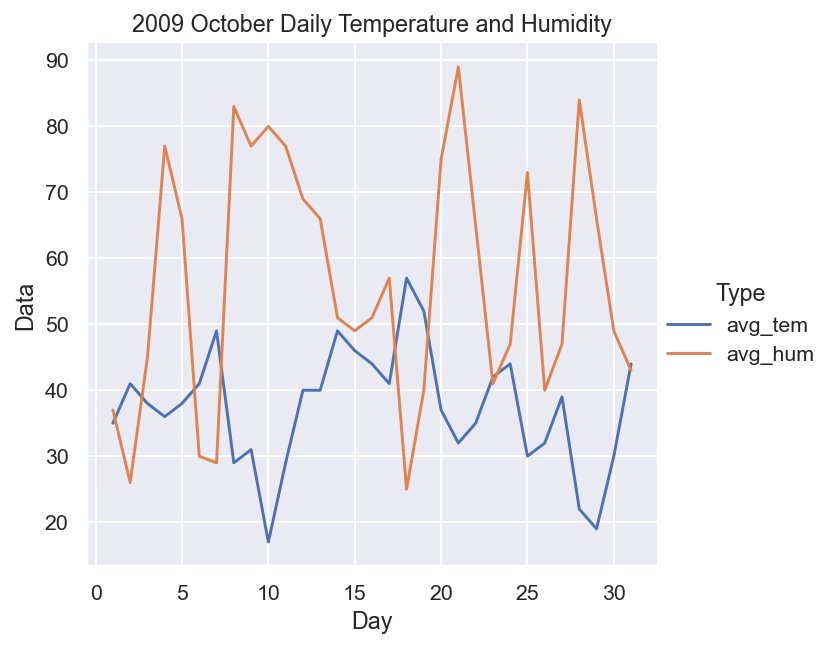

In [ ]:
# Daily average temperature 2009-10
sns.relplot(data = df_2009_10, kind='line', x='Day', y='Data', hue='Type').set(title='2009 October Daily Temperature and Humidity')
plt.subplots_adjust(top=0.88)
# Save plot as a figure.
# plt.savefig('../images/October Daily Average Temperature and Humidity_2009.png') 

### **Figure 4**
*The plots above shows the daily average temperature and humidity in October 2019. The blue line represents the average tmperature and the orange one the average humidity. The lines runs to the opposite directions for most of the time.*

As we can see in the plots, the two values goes to the opposite way. Hence, there will be high possibility that when one of the value increased, the other one decreased. 
However, it is too soon to conclude the answer. Therefore, we visuallized the whole data in 2009, 2014, 2019. We picked three years, five years in between each year and total ten years across to make the conclusion more reliable. 

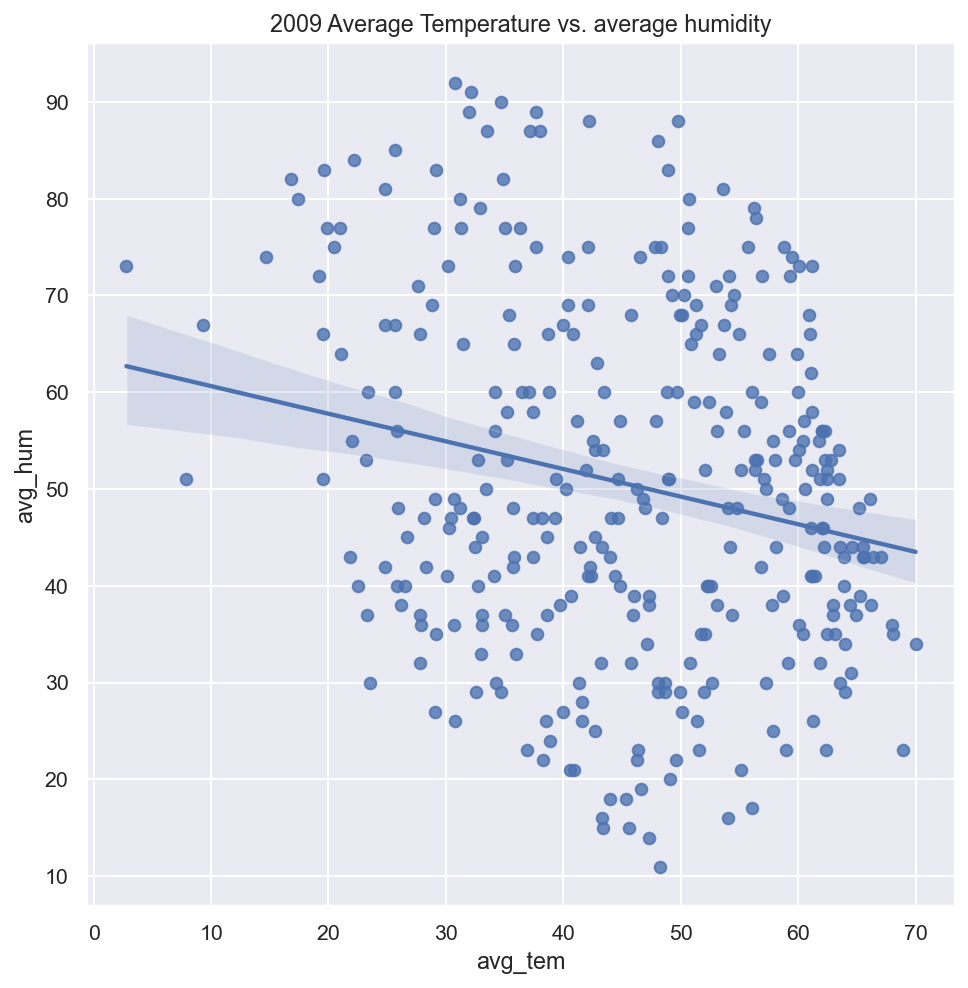

In [ ]:
# Average Temperature vs. average humidity in 2009
plot1 = sns.regplot(data = df_2009_all, x='avg_tem', y='avg_hum').set(title='2009 Average Temperature vs. average humidity')
plt.subplots_adjust(top=0.88)
# Save plot as a figure.
# plt.savefig('../images/Average Temperature vs. average humidity_2009.png')   

### **Figure 5**
*The plots above shows average temperature vs. average humidity in 2019. The linear line represents the overall direction the data goes and appear to be in descending.*

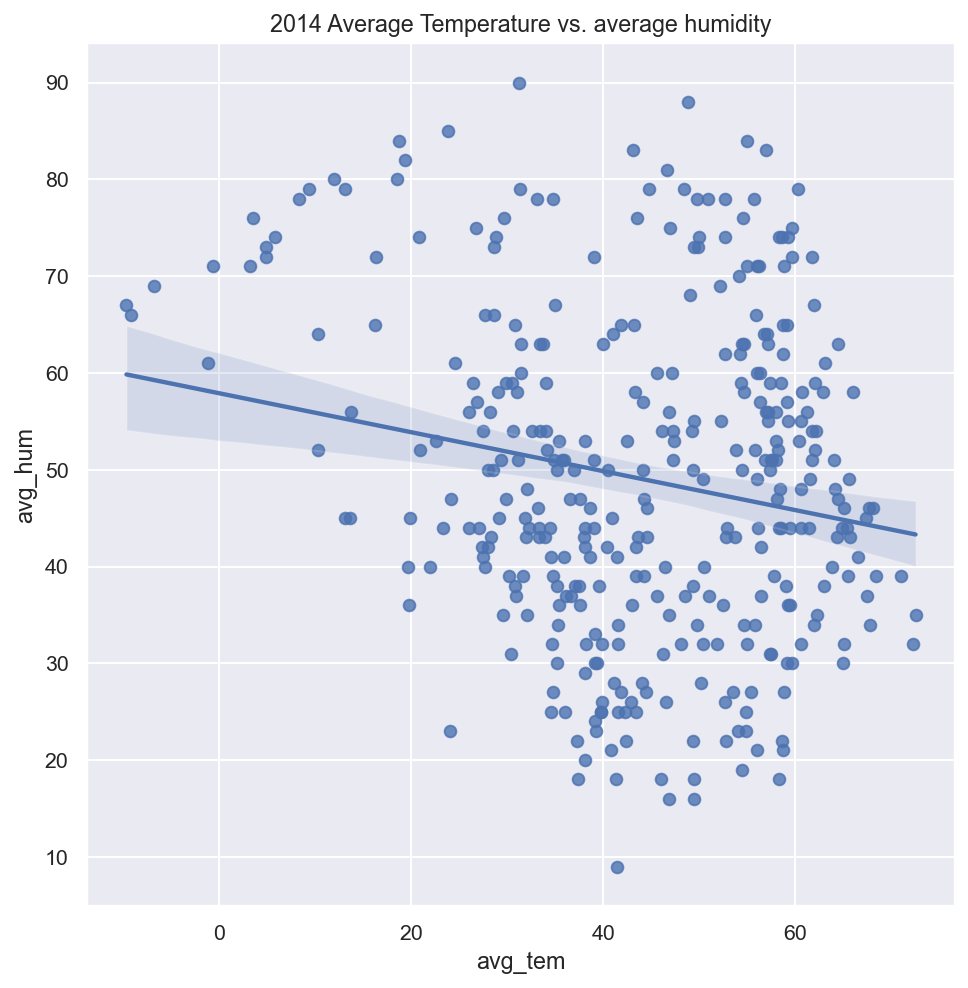

In [ ]:
# Average Temperature vs. average humidity in 2014
plot2 = sns.regplot(data = df_2014_all, x='avg_tem', y='avg_hum').set(title='2014 Average Temperature vs. average humidity')
plt.subplots_adjust(top=0.88)
# Save plot as a figure.
# plt.savefig('../images/Average Temperature vs. average humidity_2014.png')  

### **Figure 6**
*The plots above shows average temperature vs. average humidity in 2014. The linear line represents the overall direction the data goes and appear to be in descending.*


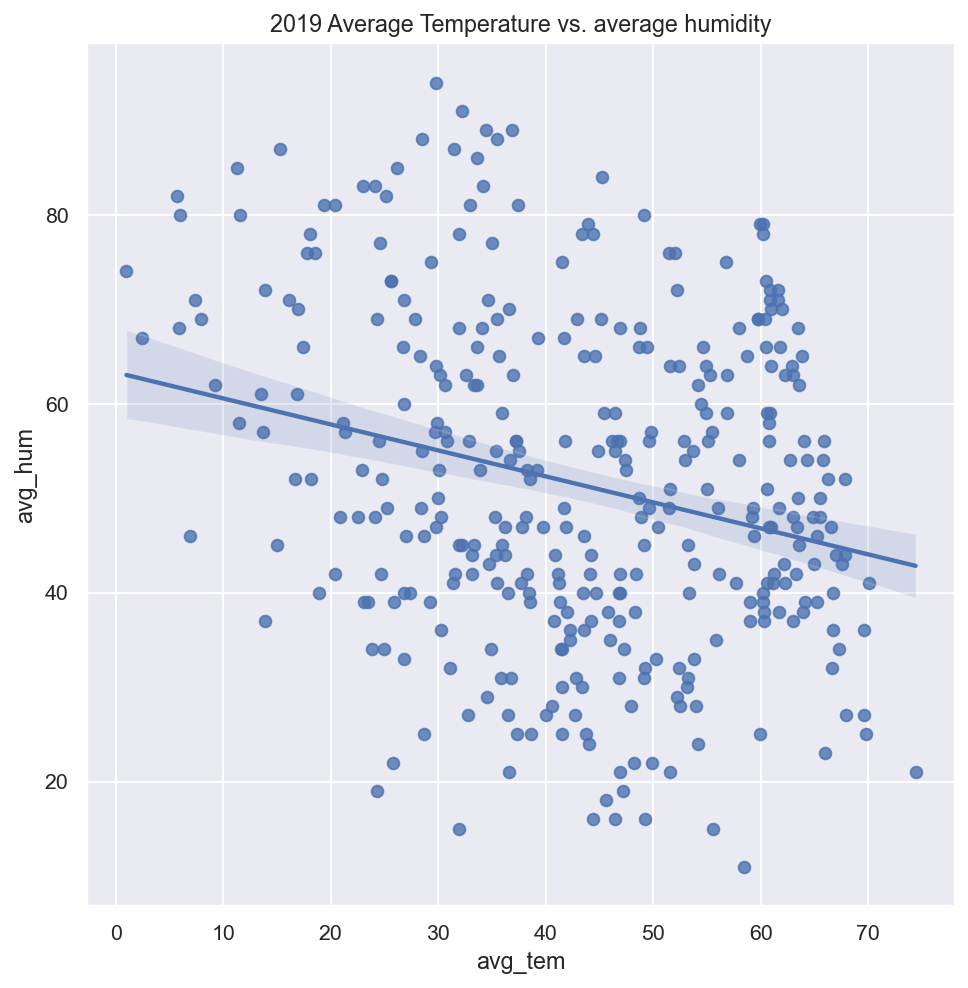

In [11]:
# Average Temperature vs. average humidity in 2019
plot3 = sns.regplot(data = df_2019_all, x='avg_tem', y='avg_hum').set(title='2019 Average Temperature vs. average humidity')
plt.subplots_adjust(top=0.88)
# Save plot as a figure.
# plt.savefig('../images/Average Temperature vs. average humidity_2019.png')  

### **Figure 7**
*The plots above shows average temperature vs. average humidity in 2019. The linear line represents the overall direction the data goes and appear to be in descending.*

## Conclusion
By visuallizing, observing and discovering the plots. I found that the average humidity is highly related to the average temperature. The average humidity increased as the average temperature decreased. Hence, colder at Estes Park, Colorado, wetter there will be. Although there could be several days that go to the opposite way, this conclusion is able to suit nearly all days and years at Estes Park.

## Export cleared dataset

In [ ]:
pd.read_csv(raw_file_path)# Export dataframe to .csv file (DONE)
# df.to_csv('../data/processed/ChiCheng_ClearedData.csv')